# Homework 5 Theory

## Question 1

### Part (a)

No, $X_3$ and $X_4$ are not correlated because $\Sigma_{34} = \Sigma_{43} = 0$.

### Part (b)

We first find the covariance matrix $cov(X_3,X_4 | X_1,X_2)$ by creating a partition.

For our partition, let...
$$x_1=\begin{bmatrix}
           X_1 \\
           X_2
         \end{bmatrix}$$
$$x_2=\begin{bmatrix}
           X_3 \\
           X_4
         \end{bmatrix}$$

With this partition, we have a submatrix of $Q$ as follows:
$$Q_{22} = \begin{bmatrix}
           5 & 0 \\
           0 & 5
         \end{bmatrix}$$


The off-diagonal values of $Q_{22}$ are zero. **Thus, $X_3$ and $X_4$ are not conditionally correlated.**

### Part (c)

To find the Markov blanket of $X_2$, we need only use the given matrix $Q$.

We observe that $Q_{23} = Q_{24} = 0$ while the other elements of the second row of $Q$ are non-zero.

From this we find the Markov blanket of $X_2$:
$$X_2 \perp X_3,X_4|X_1$$

**Thus $X_1$ is the Markov blanket.**

### Part (d)

To create $Y$ as given in the question, let us define a matrix $A$ that allows us to collect the appropriate values $X_i$ and their signs:
$$A = \begin{bmatrix}
           1 & 0 & 0 & 1 \\
           0 & 1 & 0 & -1
         \end{bmatrix}$$

We can now find $cov(Y)$ as follows:
$$cov(Y) = A \Sigma A^T$$
$$= \begin{bmatrix}
           0.91428571 & -0.62857143 \\
           -0.62857143 & 0.65714286
         \end{bmatrix}$$

A code-based solution is given below to confirm results:

In [2]:
import numpy as np

Q = np.array([[5,3,-3,0],
              [3,5,0,0],
              [-3,0,5,0],
              [0,0,0,5]])
sigma = np.linalg.inv(Q)
A = np.array([[1, 0, 0, 1],
              [0, 1, 0, -1]])

# Calculate the covariance matrix of Y
cov_Y = A @ sigma @ A.T

print('cov(Y):')
print(cov_Y)

cov(Y):
[[ 0.91428571 -0.62857143]
 [-0.62857143  0.65714286]]


## Question 2

### Part (a)

We know that $\mu_{k;t+1} = \frac{\sum_{i=1}^n \gamma_{ik;t} x^{(i)}}{\sum_{i=1}^n \gamma_{ik;t}}$ so we first find the necessary $\gamma_{ik}.$

$$\gamma_{11} = Pr(Z=1|X=-1;\theta_0) = \frac{1/2\phi(x^{(1)}|\mu_1,1)}{1/2\phi(x^{(1)}|\mu_1,1) + 1/2\phi(x^{(1)}|\mu_2,1)}$$
$$= \frac{1/2\phi(x^{(1)}|-2,1)}{1/2\phi(x^{(1)}|-2,1) + 1/2\phi(x^{(1)}|2,1)}$$

Plugging in values into the Gaussian PDF $\phi(x|\mu,\sigma^2)$:
$$\gamma_{11} = \frac{1/2\phi(x^{(1)}|-2,1)}{1/2\phi(x^{(1)}|-2,1) + 1/2\phi(x^{(1)}|2,1)}$$
$$= \frac{1/2\phi(-1|-2,1)}{1/2\phi(-1|-2,1) + 1/2\phi(-1|2,1)}$$

$$= 0.9820$$

From this we find $\gamma_{12}:$
$$\gamma_{12} = 1 - \gamma_{11}$$
$$= 1 - 0.9820 = 0.0180$$

We use an analogous process to find $\gamma_{21}:$
$$\gamma_{21} = Pr(Z=1|X=1;\theta_0) = \frac{1/2\phi(x^{(2)}|\mu_1,1)}{1/2\phi(x^{(2)}|\mu_1,1) + 1/2\phi(x^{(2)}|\mu_2,1)}$$
$$= \frac{1/2\phi(x^{(2)}|-2,1)}{1/2\phi(x^{(2)}|-2,1) + 1/2\phi(x^{(2)}|2,1)}$$
$$= \frac{1/2\phi(1|-2,1)}{1/2\phi(1|-2,1) + 1/2\phi(1|2,1)}$$
$$= 0.0180$$

And $\gamma_{22}:$
$$\gamma_{22} = 1 - 0.0180 = 0.9820$$

We can now find $\mu_{1;t+1}:$
$$\mu_{1;t+1} = \frac{\gamma_{11} x^{(1)} + \gamma_{12} x^{(2)}}{\gamma_{11} + \gamma_{12}}$$
$$= \frac{(0.9820)(-1) + (0.0180)(1)}{(0.9820) + (0.0180)}$$
$$= -0.964$$

And $\mu_{2;t+1}$:
$$\mu_{2;t+1} = \frac{\gamma_{12} x^{(1)} + \gamma_{22} x^{(2)}}{\gamma_{12} + \gamma_{22}}$$
$$= \frac{(0.0180)(-1) + (0.9820)(1)}{(0.9820) + (0.0180)}$$
$$= 0.964$$

**Thus we find $\mu_{1;t+1} = -0.964$ and $\mu_{2;t+1} = 0.964$**

### Part (b)

Because each distribution in the mixture has an equal weight and the variance of each distribution remains constant, the centroids will converge in the middle of the two data points. **Thus the centroids will not converge to $\mu_1 = -1$ and $\mu_2 = 1$.**

A code implementation demonstrating this is given below:

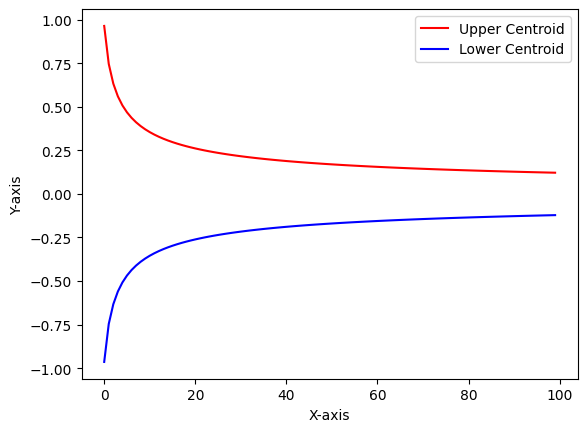

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm

K = 2
I = 2
gamma = np.zeros((I,K))
x = np.array([-1,1])
mu = np.array([-2,2])
container_l = []
container_h = []

for _ in range(100):
    for k in range(K):
        for i in range(I):
            gamma[i, k] = (norm.pdf(x[i], loc=mu[k], scale=1) /
                          (norm.pdf(x[i], loc=mu[0], scale=1) + norm.pdf(x[i], loc=mu[1], scale=1)))
    t = np.zeros(2)
    for k in range(K):
        t[k] = np.sum(gamma[:, k] * x) / np.sum(gamma[:, k])
    container_l.append(t[0])
    container_h.append(t[1])
    mu = t


x_values = list(range(len(container_l)))
plt.plot(x_values, container_h, label='Upper Centroid', color='red')
plt.plot(x_values, container_l, label='Lower Centroid', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

### Part (c)

As we found in a previous part:
$$\gamma_{11} = Pr(Z=1|X=-1;\theta_0) = \frac{1/2\phi(x^{(1)}|\mu_1,1)}{1/2\phi(x^{(1)}|\mu_1,1) + 1/2\phi(x^{(1)}|\mu_2,1)}$$
$$= \frac{1/2\phi(x^{(1)}|2,1)}{1/2\phi(x^{(1)}|2,1) + 1/2\phi(x^{(1)}|2,1)}$$
$$= \frac{1/2}{1/2 + 1/2} = 1/2$$
$$\gamma_{12} = 1 - \gamma_{11} = 1 - 1/2 = 1/2$$

The analogous procedure is followed for $\gamma_{21}$ and $\gamma_{22}$:
$$\gamma_{21} = Pr(Z=1|X=1;\theta_0) = \frac{1/2\phi(x^{(2)}|\mu_1,1)}{1/2\phi(x^{(2)}|\mu_1,1) + 1/2\phi(x^{(2)}|\mu_2,1)}$$
$$= \frac{1/2\phi(x^{(2)}|2,1)}{1/2\phi(x^{(2)}|2,1) + 1/2\phi(x^{(2)}|2,1)}$$
$$= \frac{1/2}{1/2 + 1/2} = 1/2$$
$$\gamma_{22} = 1 - \gamma_{21} = 1 - 1/2 = 1/2$$

Thus we find that $\gamma_{11} = \gamma_{12} = \gamma_{21} = \gamma_{22} = 1/2$

We can now find the new centroid locations after this iteration.
For $\mu_{1;t=1}$:
$$\mu_{1;t=1} = \frac{\sum_{i=1}^2 \gamma_{i1;t=0} x^{(i)}}{\sum_{i=1}^2 \gamma_{i1;t=0}}$$
$$= \frac{1/2x^{(1)} + 1/2x^{(2)}}{1/2 + 1/2} = \frac{1/2(-1) + 1/2(1)}{1}$$
$$= 0$$

Now for $\mu_{2;t=1}$:
$$\mu_{2;t=1} = \frac{\sum_{i=1}^2 \gamma_{i2;t=0} x^{(i)}}{\sum_{i=1}^2 \gamma_{i2;t=0}}$$
$$= \frac{1/2x^{(1)} + 1/2x^{(2)}}{1/2 + 1/2} = \frac{1/2(-1) + 1/2(1)}{1}$$
$$= 0$$

Thus, after the first iteration, $\mu_{1;t=1} = \mu_{2;t=1} = 0$

We can also find the new weights after the first iteration:
$$w_{1;t=1} = \frac{\sum_{i=1}^2 \gamma_{i1;t=0}}{\sum_{i=1}^2 \sum_{k=1}^2 \gamma_{ik;t=0}}$$
$$= \frac{1/2 + 1/2}{1/2 + 1/2 + 1/2 + 1/2} = 1/2$$
$$w_{2;t=1} = \frac{\sum_{i=1}^2 \gamma_{i2;t=0}}{\sum_{i=1}^2 \sum_{k=1}^2 \gamma_{ik;t=0}}$$
$$= \frac{1/2 + 1/2}{1/2 + 1/2 + 1/2 + 1/2} = 1/2$$

Thus we find that $w_{1;t=1} = w_{2;t=1} = 1/2$

**Note that these weights are identical to the weights we used in the first iteration of the algorithm. These weights being identical to last iteration will cause all of our $\gamma_{ik}$ values to be identical to last iteration, which will in turn cause our $\mu_{1;t=2}$ and $\mu_{2;t=2}$ to be identical to last iteration, namely $\mu_{1;t=2} = \mu_{2;t=2} = 0$. Thus the algorithm has ceased moving the centroids, and we have reached convergence.**

### Part (d)

We are given that, at initialization, $\mu_{t=0}^{(1)} = -2$ and $\mu_{t=0}^{(2)} = 2$. Holding these mean values as constant we now update the labels $z^{(i)}$ of our data points.

We assign labels to data points $x^{(i)}$ such that we minimize the squared euclidian distances between a point and the centroid of label $z^{(i)}$, $\mu^{z^{(i)}}$. That is,
$$z^{(i)} = argmin \|x^{(i)} - \mu^{(k)}\|^2$$

In other words, we assign each data point to the cluster with the closest centroid.

We are given that point $x^{(1)}$ lies at -1 and point $x^{(2)}$ lies at 1. Point $x^{(1)}$ is nearer to $\mu_{t=0}^{(1)} = -2$ than it is to $\mu_{t=0}^{(2)} = 2$ so $x^{(1)}$ is assigned to cluster 1. Point $x^{(2)}$ is closer to $\mu_{t=0}^{(2)} = 2$ than it is to $\mu_{t=0}^{(1)} = -2$ so $x^{(2)}$ is assigned to cluster 2.

Now that labels have been updated, we hold labels constant and update our centroid placements.

Centroid $\mu_{t=0}^{(1)}$ has only one point in its cluster: $x^{(1)}$. Similarly, centroid $\mu_{t=0}^{(2)}$ has only one point in its cluster: $x^{(2)}$. To minimize the distance between each centroid and its respective point, each centroid should lie directly atop the point in its cluster. Thus centroid $\mu_{t=1}^{(1)}$ lies at -1 and centroid $\mu_{t=1}^{(2)}$ lies at 1.

We now recurse, repeating the process by holding centroids as fixed and updating labels. However, we note that each centroid now lies coincident with the point in its cluster, meaning that the euclidean distance from each centroid to its respective point is 0. **Thus, our centroids do not move in this update step, indicating that we have reached convergence.**